In [57]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from typing import List

In [2]:
## What you ran perform_grid_search with
scanned_grid = {
    'learning_rate': np.logspace(-2.5, -1.75, 4),
    'max_leaf_nodes': [200, 400, 800],
    'max_iter'    : [1500, 2500, 5000],
}

In [3]:
csv_dir = './results/'
csv_file = csv_dir + 'HBDT_crossval_results.csv'

In [4]:
df_cvres = pd.read_csv(csv_file)
df_cvres

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_iter,param_max_leaf_nodes,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1265.389575,33.328051,45.409411,1.502621,0.003162,1500,200,"{'learning_rate': 0.0031622776601683794, 'max_...",0.830315,0.829196,...,0.828480,0.003184,36,0.868201,0.868659,0.868564,0.869466,0.868501,0.868678,4.227278e-04
1,1538.310767,11.202635,41.199696,0.852420,0.003162,1500,400,"{'learning_rate': 0.0031622776601683794, 'max_...",0.836631,0.835255,...,0.834569,0.002463,35,0.905179,0.905232,0.905077,0.905753,0.905060,0.905260,2.543955e-04
2,1885.390143,26.484724,47.367490,1.498340,0.003162,1500,800,"{'learning_rate': 0.0031622776601683794, 'max_...",0.839095,0.838710,...,0.838155,0.002107,34,0.951070,0.951111,0.950802,0.951404,0.951295,0.951136,2.068401e-04
3,2185.418987,59.030413,72.391797,1.208046,0.003162,2500,200,"{'learning_rate': 0.0031622776601683794, 'max_...",0.844198,0.843652,...,0.842534,0.002932,33,0.899660,0.899808,0.899605,0.900263,0.899899,0.899847,2.328195e-04
4,2663.538056,36.312893,76.253081,2.495118,0.003162,2500,400,"{'learning_rate': 0.0031622776601683794, 'max_...",0.848454,0.847460,...,0.846688,0.002253,31,0.942020,0.941821,0.941965,0.942471,0.941954,0.942046,2.223656e-04
5,3422.312032,79.405178,83.299180,1.635882,0.003162,2500,800,"{'learning_rate': 0.0031622776601683794, 'max_...",0.849552,0.848768,...,0.848217,0.001990,29,0.985199,0.985074,0.985007,0.985207,0.985078,0.985113,7.776924e-05
6,3751.030907,72.272771,155.134759,3.904781,0.003162,5000,200,"{'learning_rate': 0.0031622776601683794, 'max_...",0.852287,0.852216,...,0.851359,0.002573,25,0.941830,0.941628,0.941074,0.941948,0.942415,0.941779,4.369668e-04
7,4484.863611,58.740872,147.184613,3.497844,0.003162,5000,400,"{'learning_rate': 0.0031622776601683794, 'max_...",0.854700,0.853852,...,0.853388,0.002179,20,0.983617,0.983257,0.983473,0.983646,0.983685,0.983536,1.566334e-04
8,5826.220290,60.966294,151.843343,1.598953,0.003162,5000,800,"{'learning_rate': 0.0031622776601683794, 'max_...",0.855267,0.854241,...,0.854154,0.001923,17,0.999969,0.999937,0.999967,0.999944,0.999974,0.999958,1.492671e-05
9,1338.153395,44.936678,45.399797,2.160311,0.005623,1500,200,"{'learning_rate': 0.005623413251903491, 'max_i...",0.845848,0.844864,...,0.843919,0.002952,32,0.904042,0.904133,0.904109,0.904473,0.904118,0.904175,1.521470e-04


In [25]:
## Define column 'diff_score', difference between train and test.
## Train is always better than testing, unless you somehow managed
## to create a sentient AI.
df_cvres['diff_score'] = df_cvres['mean_train_score'] - df_cvres['mean_test_score']
## Drop pointless dictionary column
df_cvres.drop(columns=['params'], inplace=True, errors='ignore')
## Rename parameter columns
df_cvres.rename({'param_max_leaf_nodes' : 'max_leaf_nodes',
                 'param_learning_rate' : 'learning_rate',
                 'param_max_iter' : 'max_iter'}, inplace=True, axis='columns', errors='ignore')

In [6]:
# ## List of hyperparameters preceded by 'param_', i.e. how they appaear in the results
# param_column_list = [f'param_{name}' for name in scanned_grid.keys()]

# ## First create test score results
# ## Extract split scores and parameter 
# df_test_scores = df_cvres.loc[:, param_column_list + [f'split{i}_test_score' for i in range(5)]]
# ## Set hyperpar values as indices
# df_test_scores.set_index(param_column_list, inplace=True)
# ## Omit split score designation, just leave the iterator
# df_test_scores.rename({f'split{i}_test_score' : i for i in range(5)}, inplace=True, axis='columns')
# ## Stack the dataframe, i.e. the splits become another multi-index
# ## I'm just riffing at this point, I have no idea why Salvatore did this
# df_test_scores = pd.DataFrame(df_test_scores.stack()).rename({0 : 'score'}, axis='columns')
# ## Create dataset column
# df_test_scores['dataset'] = 'test'
# ## Turn it into an index, fuck if I know
# df_test_scores.set_index('dataset', inplace=True, append=True)
# ## See the unnamed index from before? The split? It has a name now
# df_test_scores.index.set_names(names='split', level=len(param_column_list), inplace=True)

# ## Now do the exact same thing for train
# df_train_scores = df_cvres.loc[:, param_column_list + [f'split{i}_train_score' for i in range(5)]]
# df_train_scores.set_index(param_column_list, inplace=True)
# df_train_scores.rename({f'split{i}_train_score' : i for i in range(5)}, inplace=True, axis='columns')
# df_train_scores = pd.DataFrame(df_train_scores.stack()).rename({0 : 'score'}, axis='columns')
# df_train_scores['dataset'] = 'train'
# df_train_scores.set_index('dataset', inplace=True, append=True)
# df_train_scores.index.set_names(names='split', level=len(param_column_list), inplace=True)

# ## Concat and trash. Now the indices are columns.
# ## I'm sure there's a point, I'm just too dumb to get it
# df_scores = pd.concat([df_test_scores, df_train_scores]).reset_index()
# del(df_test_scores, df_train_scores)

# ## And now we turn the columns back into indices
# df_scores.set_index(param_column_list + ['split', 'dataset'], inplace=True)

# ## Compute difference in score
# df_scores_train = df_scores.loc[df_scores.index.get_level_values('dataset')=='train', :].droplevel('dataset', axis='rows')
# df_scores_test = df_scores.loc[df_scores.index.get_level_values('dataset')=='test', :].droplevel('dataset', axis='rows')
# df_scores_diff = df_scores_train - df_scores_test
# df_scores['score difference'] = df_scores_diff['score']

# del(df_scores_train, df_scores_test, df_scores_diff)

# df_scores.reset_index(inplace=True)
# df_scores.rename({'param_max_leaf_nodes' : 'max # of leaf nodes per tree',
#                   'param_learning_rate' : 'learning rate',
#                   'param_max_iter' : '# of trees'
#                  }, inplace=True, axis='columns')

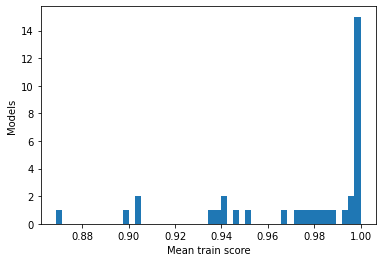

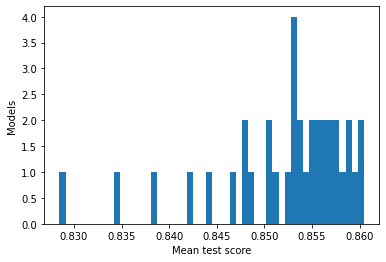

In [51]:
plt.hist(df_cvres['mean_train_score'], bins=50, histtype='bar', stacked=True)
plt.xlabel('Mean train score')
plt.ylabel('Models')
plt.show()

plt.hist(df_cvres['mean_test_score'], bins=50, histtype='bar', stacked=True)
plt.xlabel('Mean test score')
plt.ylabel('Models')
plt.show()

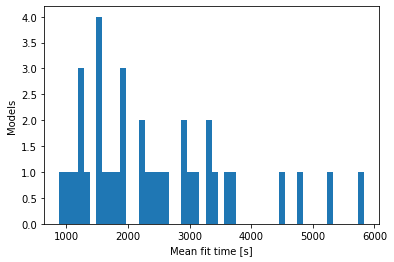

In [52]:
plt.hist(df_cvres['mean_fit_time'], bins=50, histtype='bar', stacked=True)
plt.xlabel('Mean fit time [s]')
plt.ylabel('Models')
plt.show()

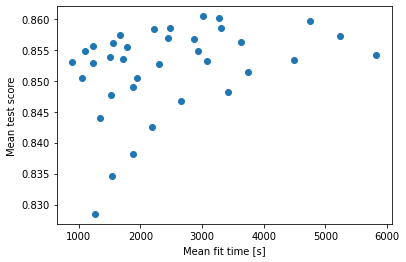

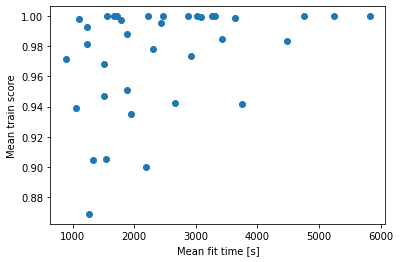

In [56]:
plt.scatter(df_cvres['mean_fit_time'], df_cvres['mean_test_score'])
plt.xlabel("Mean fit time [s]")
plt.ylabel("Mean test score")
plt.show()

plt.scatter(df_cvres['mean_fit_time'], df_cvres['mean_train_score'])
plt.xlabel("Mean fit time [s]")
plt.ylabel("Mean train score")
plt.show()

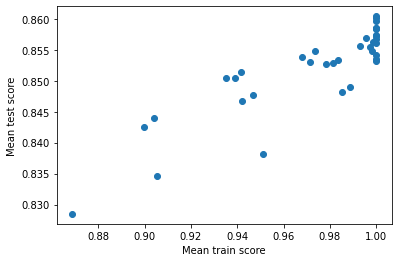

In [54]:
plt.scatter(df_cvres['mean_train_score'], df_cvres['mean_test_score'])
plt.xlabel("Mean train score")
plt.ylabel("Mean test score")
plt.show()

In [63]:
def sort_results_by(
    sort_by: str,
    columns_to_show: List[str],
    ascending: bool = True,
    test_score_threshold = -1
) -> pd.DataFrame:
    if test_score_threshold == -1:
        return df_cvres.loc[:, columns_to_show].sort_values(sort_by, ascending=ascending)
    else:
        return df_cvres.loc[df_cvres['mean_test_score'] >= test_score_threshold, columns_to_show].sort_values(sort_by, ascending=ascending)

In [64]:
columns_to_show = [
    'max_leaf_nodes',
    'learning_rate',
    'max_iter',
    'mean_train_score', 'mean_test_score', 'diff_score', 
    'std_test_score', 'mean_fit_time'
]

In [65]:
sort_results_by('diff_score', columns_to_show)

,max_leaf_nodes,learning_rate,max_iter,mean_train_score,mean_test_score,diff_score,std_test_score,mean_fit_time
0,200,0.003162,1500,0.868678,0.828480,0.040198,0.003184,1265.389575
3,200,0.003162,2500,0.899847,0.842534,0.057313,0.002932,2185.418987
9,200,0.005623,1500,0.904175,0.843919,0.060256,0.002952,1338.153395
1,400,0.003162,1500,0.905260,0.834569,0.070691,0.002463,1538.310767
12,200,0.005623,2500,0.935217,0.850514,0.084703,0.002628,1942.159230
18,200,0.010000,1500,0.939248,0.850434,0.088814,0.002494,1047.654795
6,200,0.003162,5000,0.941779,0.851359,0.090420,0.002573,3751.030907
4,400,0.003162,2500,0.942046,0.846688,0.095358,0.002253,2663.538056
10,400,0.005623,1500,0.946885,0.847748,0.099136,0.002405,1515.277643
2,800,0.003162,1500,0.951136,0.838155,0.112981,0.002107,1885.390143
